### Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data from admissions.csv 

In [2]:
!!cd

['c:\\classroom\\may1\\admission']

In [3]:
df = pd.read_csv("admission.csv")

#### Understand data 

In [4]:
df.head()

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
# drop column Sno as it is not imp.
df.drop(columns=['Sno'], inplace=True) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gre       500 non-null    int64  
 1   Toefl     500 non-null    int64  
 2   Rating    500 non-null    int64  
 3   Sop       500 non-null    float64
 4   Lor       500 non-null    float64
 5   Cgpa      500 non-null    float64
 6   Research  500 non-null    int64  
 7   Chance    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
df.describe()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Data Visualization 

### Univariate Analysis

In [9]:
df['Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: Rating, dtype: int64

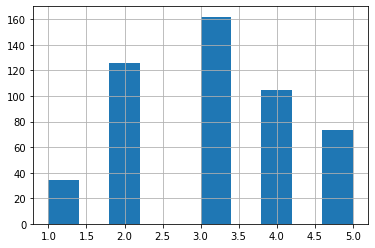

In [10]:
df['Rating'].hist()

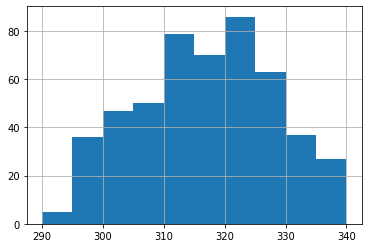

In [11]:
df['Gre'].hist()

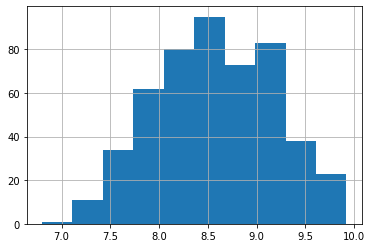

In [12]:
df['Cgpa'].hist()

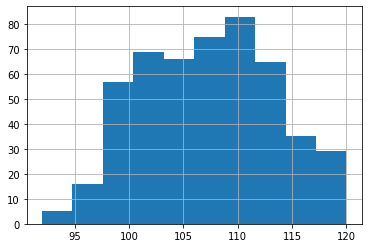

In [13]:
df['Toefl'].hist()

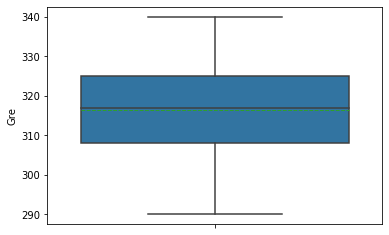

In [14]:
sns.boxplot(y="Gre",data=df, showmeans=True, meanline=True)

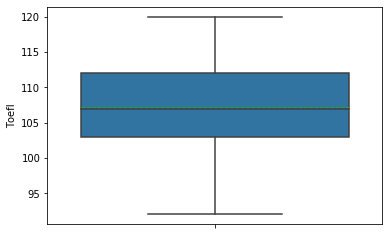

In [15]:
sns.boxplot(y="Toefl",orient="v", data=df, showmeans=True, meanline=True)

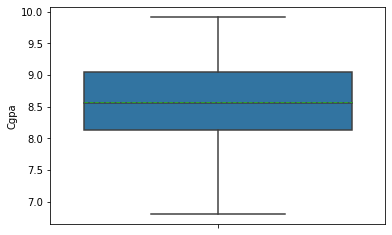

In [16]:
sns.boxplot(y="Cgpa",data=df, showmeans=True, meanline=True)

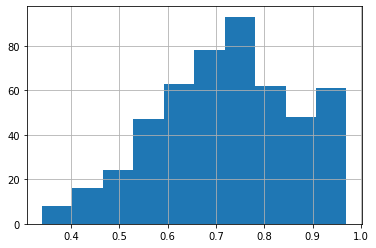

In [17]:
df.Chance.hist()

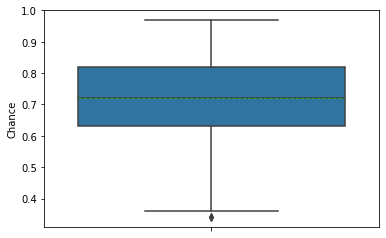

In [18]:
sns.boxplot(y="Chance",data=df, showmeans=True, meanline=True)

### Bi-variate Ananlysis

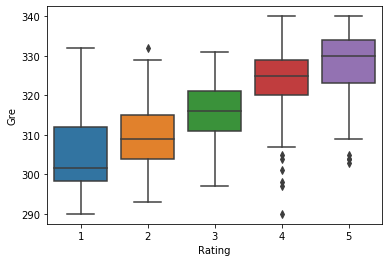

In [19]:
sns.boxplot(y="Gre", x="Rating", data=df)   # Compare categorical with continous variable 

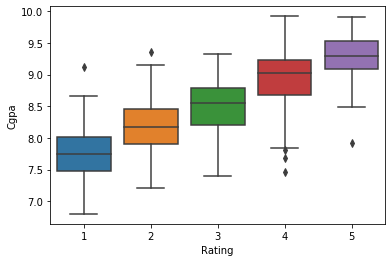

In [20]:
sns.boxplot(y="Cgpa", x ="Rating", data=df)

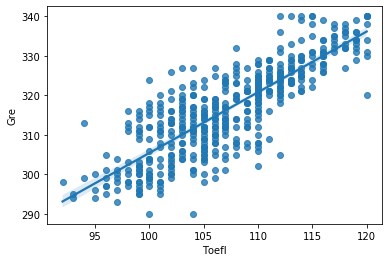

In [21]:
sns.regplot(x="Toefl", y = "Gre", data = df)

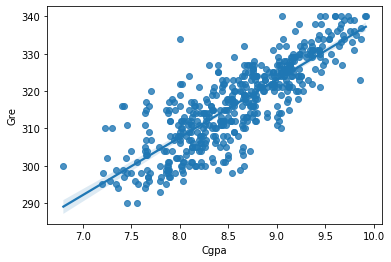

In [22]:
sns.regplot(x='Cgpa',y = 'Gre', data  = df)

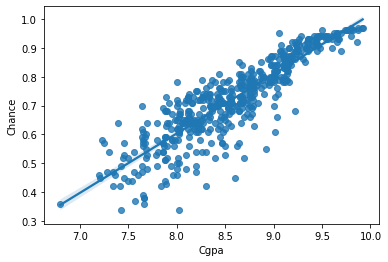

In [23]:
sns.regplot(data=df, x='Cgpa',y='Chance') 

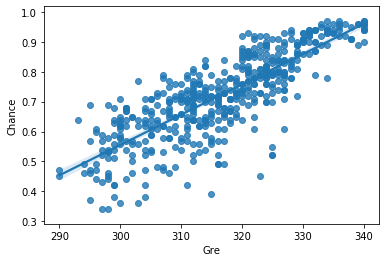

In [24]:
sns.regplot(data=df, x='Gre',y='Chance') 

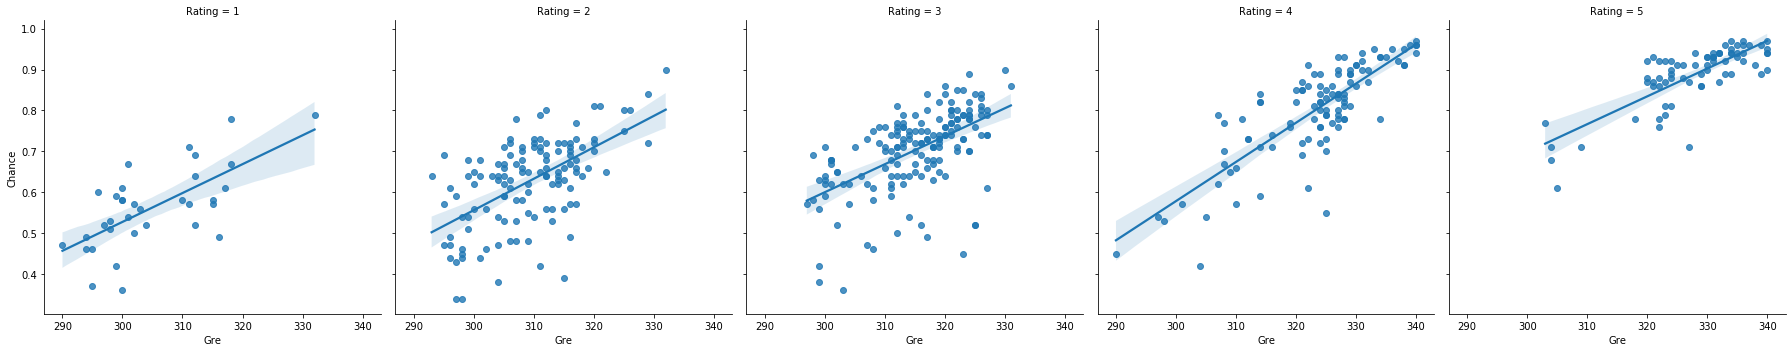

In [25]:
sns.lmplot(data=df, x='Gre',y='Chance',col="Rating") 

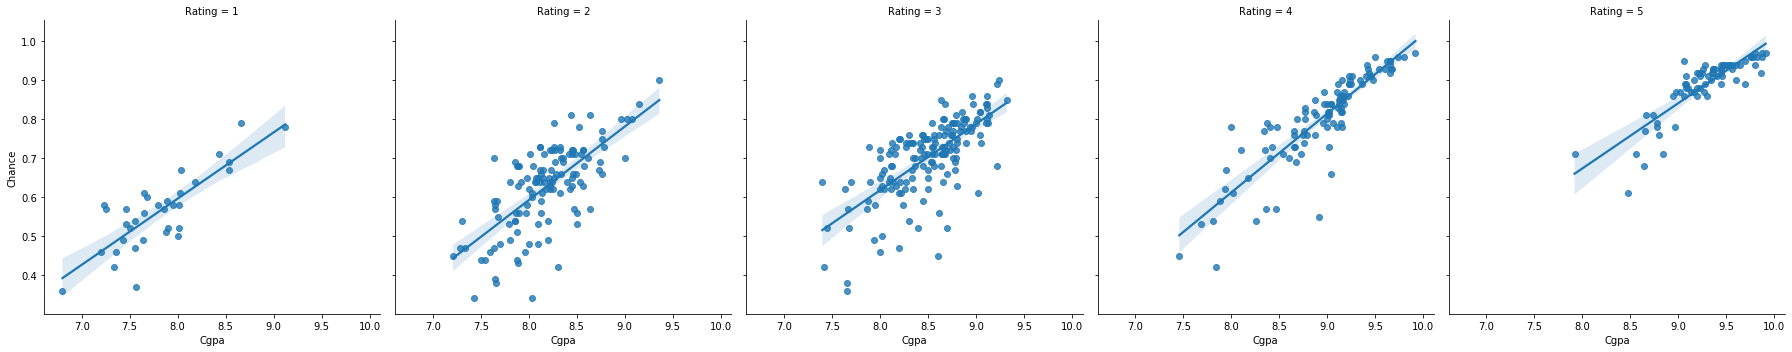

In [26]:
sns.lmplot(data=df, x='Cgpa',y='Chance',col="Rating") 

In [27]:
corrmat = df.corr()

In [28]:
corrmat

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


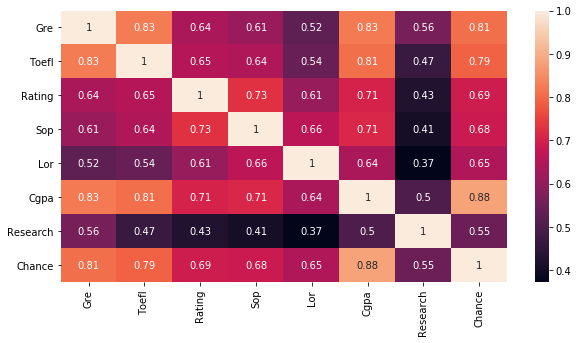

In [29]:
sns.heatmap(corrmat,annot=True)
plt.gcf().set_size_inches(10,5)

In [30]:
corrmat['Chance'].sort_values(ascending=False)

Chance      1.000000
Cgpa        0.882413
Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Research    0.545871
Name: Chance, dtype: float64

### Build Machine Learning Model 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
X = df[['Gre','Toefl','Cgpa']]
y = df['Chance'] * 100

In [33]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [34]:
X_train.shape, X_test.shape

((400, 3), (100, 3))

In [35]:
## Fit model or Train Model or Build model 
lr_model = LinearRegression()
lr_model.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
lr_model.coef_  # Slopes

array([ 0.2530053 ,  0.31789215, 14.25427517])

In [37]:
lr_model.intercept_

-164.24396080709775

### Evaluate Model 

In [38]:
lr_model.score(X_train,y_train)   # R2 Score

0.8122343451664386

In [39]:
## Evaluate Model using test data 
y_pred = lr_model.predict(X_test)

In [40]:
res = pd.DataFrame({'Actual' : y_test, 'Pred' : y_pred})

In [41]:
res.head(20)

,Actual,Pred
90,64.0,62.802152
254,85.0,83.209435
283,80.0,79.119818
445,91.0,85.046086
461,68.0,60.222891
15,54.0,66.888863
316,54.0,55.297329
489,65.0,68.293116
159,52.0,55.296602
153,79.0,75.833340


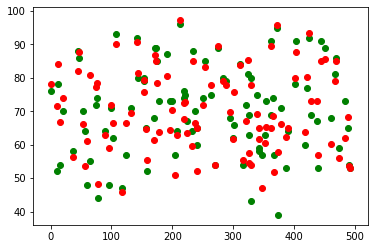

In [42]:
plt.scatter(res.index, res['Actual'], color='green')
plt.scatter(res.index, res['Pred'], color='red')

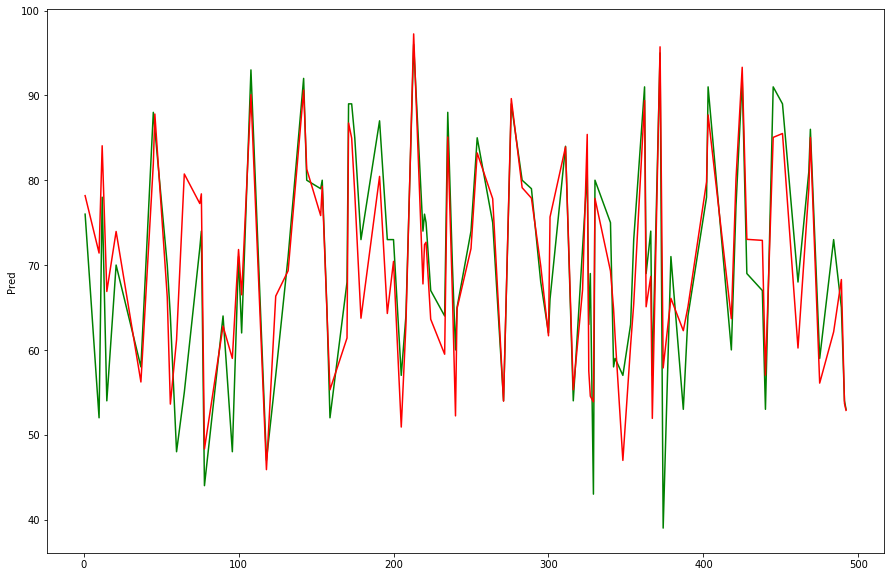

In [43]:
plt.gcf().set_size_inches(15,10)
sns.lineplot(res.index, res['Actual'], color='green')
sns.lineplot(res.index, res['Pred'], color='red')

In [44]:
## get MSE, R2 and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [45]:
mse = mean_squared_error(res['Actual'], res['Pred'])
print(f"Mean Squared Error : {mse:0.2f}")

mae = mean_absolute_error(res['Actual'], res['Pred'])
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(res['Actual'], res['Pred'])
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 41.34
Mean Absolute Error : 4.69
R2 Score: 0.76


## pickle model

In [46]:
pd.to_pickle(lr_model,'lr_model.pickle')